In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Load data: model predictions and true values

In [2]:
df = pd.DataFrame(columns=["wt_pdb","mut_pdb","pred_score","true_label"])

ds = "w_rev_muts_w_non_binders"
cutoff = "random"
for fold in range(10):
    df = pd.concat([df, pd.read_csv(f"model_predictions/{ds}/Graphinity_predictions_test-Experimental_ddG_645-{ds}-{cutoff}-fold{fold}.csv")])
    
assert df.shape[0] == 645

### Plot

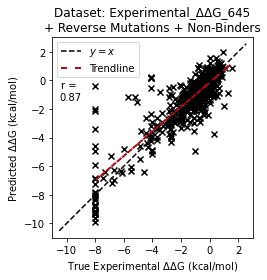

In [3]:
plt.scatter(df["true_label"],df["pred_score"],marker="x",color="k")
plt.xlabel("True Experimental $\Delta\Delta$G (kcal/mol)")
plt.ylabel("Predicted $\Delta\Delta$G (kcal/mol)")
# y=x line
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, "k--", label="$y = x$")
# trendline
z = np.polyfit(df["true_label"],df["pred_score"],1)
p = np.poly1d(z)
plt.plot(df["true_label"],p(df["true_label"]), linestyle="--", dashes=(3, 4), color="#a50f15", label="Trendline", linewidth=2)
# Pearson correlation on plot
plt.text(-9.7, -0.75,"r = \n%s" %format(pearsonr(df["true_label"],df["pred_score"])[0], ".2f"), ha="center", va="center")

plt.legend()

plt.axis("square")

ax = plt.gca()
ax.set_xticks(np.arange(-10,4,2))
ax.set_yticks(np.arange(-10,4,2))
plt.ylim(-11,3)
plt.xlim(-11,3)

plt.title("Dataset: Experimental_ΔΔG_645\n+ Reverse Mutations + Non-Binders")

plt.tight_layout()

plt.savefig("Figure-2a.png", dpi=300)